In [ ]:
#######  Author: Midhun Kumar #########
########## Version: 1.0 ###############

In [2]:
#Importing Necessary Libraries for ploting and data Visualization 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Supress warnings 
import warnings 
warnings.filterwarnings('ignore')

#sklearn Libraries
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE


In [3]:
#Importing dataset
master_df = pd.read_csv("train.csv")

In [4]:
#understanding the data
master_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
master_df.shape

(1460, 81)

In [6]:
#understanding the data types and columns
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#Understanding Null values
round(master_df.isnull().sum()/len(master_df)*100,2).sort_values(ascending=False).head(50)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

In [8]:
#Dropping top 6 Columns as they have more than 15 % Null values 
house_price_child_df = master_df.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","LotFrontage"], axis=1)

In [9]:
#Removing rows having more than 5 null values
print(len(house_price_child_df [house_price_child_df .isnull().sum(axis=1) > 5].index))
house_price_child_df  = house_price_child_df [house_price_child_df .isnull().sum(axis=1) <=5 ]

7


In [10]:
print(len(house_price_child_df [house_price_child_df .isnull().sum(axis=1) > 5].index))

0


In [11]:
round(house_price_child_df .isnull().sum()/len(house_price_child_df )*100,2).sort_values(ascending=False).head(50)

GarageType       5.09
GarageYrBlt      5.09
GarageFinish     5.09
GarageCond       5.09
GarageQual       5.09
BsmtExposure     2.13
BsmtFinType2     2.13
BsmtFinType1     2.06
BsmtCond         2.06
BsmtQual         2.06
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
RoofMatl         0.00
RoofStyle        0.00
SalePrice        0.00
Exterior1st      0.00
Exterior2nd      0.00
YearBuilt        0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
YearRemodAdd     0.00
HouseStyle       0.00
OverallCond      0.00
OverallQual      0.00
BldgType         0.00
Condition2       0.00
Condition1       0.00
Neighborhood     0.00
LandSlope        0.00
LotConfig        0.00
Utilities        0.00
LandContour      0.00
LotShape         0.00
Street           0.00
LotArea          0.00
MSZoning         0.00
MSSubClass       0.00
BsmtFinSF1       0.00
Heating          0.00
BsmtFinSF2       0.00
EnclosedPorch    0.00
Fireplaces       0.00
GarageCars       0.00
GarageArea

In [12]:
house_price_child_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1453 non-null   int64  
 1   MSSubClass     1453 non-null   int64  
 2   MSZoning       1453 non-null   object 
 3   LotArea        1453 non-null   int64  
 4   Street         1453 non-null   object 
 5   LotShape       1453 non-null   object 
 6   LandContour    1453 non-null   object 
 7   Utilities      1453 non-null   object 
 8   LotConfig      1453 non-null   object 
 9   LandSlope      1453 non-null   object 
 10  Neighborhood   1453 non-null   object 
 11  Condition1     1453 non-null   object 
 12  Condition2     1453 non-null   object 
 13  BldgType       1453 non-null   object 
 14  HouseStyle     1453 non-null   object 
 15  OverallQual    1453 non-null   int64  
 16  OverallCond    1453 non-null   int64  
 17  YearBuilt      1453 non-null   int64  
 18  YearRemo

Note:

`So far, we able to understand the data and deletd the top 6 Null values coloums which has more than 15 % null values`

`Also we could see some coloumns having Year values which we need to convert somthing understandable for model`


In [13]:
#checking Yr and Year columns in dataset
columns = list(house_price_child_df.columns)
year_columns =[]
for word in columns:
    if "Year" in word or "Yr" in word:
            year_columns.append(word)
print("Below columns having Year")
year_columns

Below columns having Year


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [14]:
#Need to work on the Years columns
house_price_child_df[year_columns].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
868,1948,1950,1979.0,2006
608,1934,1998,1934.0,2007
817,2002,2002,2002.0,2008
1252,1968,1968,1968.0,2009
105,2003,2004,2003.0,2008
231,1995,1996,1995.0,2009
814,1918,1950,1955.0,2006
1266,1910,1950,1960.0,2007
334,1998,1998,1998.0,2008
745,1976,1996,1994.0,2008


`we could see some of the coloumns having NaN values`

In [15]:
house_price_child_df[year_columns].max()

YearBuilt       2010.0
YearRemodAdd    2010.0
GarageYrBlt     2010.0
YrSold          2010.0
dtype: float64

In [16]:
#Adding years old columns for each year columns
house_price_child_df['YearBuilt_old'] = house_price_child_df.YearBuilt.max()-house_price_child_df.YearBuilt
house_price_child_df['YearRemodAdd_Old'] = house_price_child_df.YearRemodAdd.max()-house_price_child_df.YearRemodAdd
house_price_child_df['GarageYrBlt_Old'] = house_price_child_df.GarageYrBlt.max()-house_price_child_df.GarageYrBlt
house_price_child_df['YrSold_Old'] = house_price_child_df.YrSold.max()-house_price_child_df.YrSold

In [17]:
#Will drop the year columns now
house_price_child_df = house_price_child_df.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'],axis=1)

In [18]:
house_price_child_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1453 non-null   int64  
 1   MSSubClass        1453 non-null   int64  
 2   MSZoning          1453 non-null   object 
 3   LotArea           1453 non-null   int64  
 4   Street            1453 non-null   object 
 5   LotShape          1453 non-null   object 
 6   LandContour       1453 non-null   object 
 7   Utilities         1453 non-null   object 
 8   LotConfig         1453 non-null   object 
 9   LandSlope         1453 non-null   object 
 10  Neighborhood      1453 non-null   object 
 11  Condition1        1453 non-null   object 
 12  Condition2        1453 non-null   object 
 13  BldgType          1453 non-null   object 
 14  HouseStyle        1453 non-null   object 
 15  OverallQual       1453 non-null   int64  
 16  OverallCond       1453 non-null   int64  


In [19]:
#Verifying the new columns by indexing iloc
house_price_child_df.iloc[:,71:].sample(10)

,YearBuilt_old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
815,12,12,12.0,0
1160,32,32,32.0,0
59,38,38,37.0,2
682,14,13,14.0,2
122,52,52,52.0,2
104,79,60,59.0,3
450,80,5,78.0,4
63,89,60,20.0,0
1364,5,5,5.0,4
320,4,4,4.0,4


In [20]:
#Lets identify the NaN values 
house_price_child_df.isna().sum().sort_values(ascending=False).head(20)

GarageFinish       74
GarageCond         74
GarageYrBlt_Old    74
GarageType         74
GarageQual         74
BsmtFinType2       31
BsmtExposure       31
BsmtFinType1       30
BsmtCond           30
BsmtQual           30
MasVnrArea          8
MasVnrType          8
Electrical          1
RoofMatl            0
Exterior1st         0
Foundation          0
Exterior2nd         0
ExterQual           0
ExterCond           0
BsmtFinSF1          0
dtype: int64

In [21]:
# Will take first 12 values and impute them 
impute_cols = list(house_price_child_df.isna().sum().sort_values(ascending=False).head(13).index)

In [22]:
#Understanding the impute columns
house_price_child_df[impute_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GarageFinish     1379 non-null   object 
 1   GarageCond       1379 non-null   object 
 2   GarageYrBlt_Old  1379 non-null   float64
 3   GarageType       1379 non-null   object 
 4   GarageQual       1379 non-null   object 
 5   BsmtFinType2     1422 non-null   object 
 6   BsmtExposure     1422 non-null   object 
 7   BsmtFinType1     1423 non-null   object 
 8   BsmtCond         1423 non-null   object 
 9   BsmtQual         1423 non-null   object 
 10  MasVnrArea       1445 non-null   float64
 11  MasVnrType       1445 non-null   object 
 12  Electrical       1452 non-null   object 
dtypes: float64(2), object(11)
memory usage: 158.9+ KB


In [23]:
house_price_child_df[impute_cols].sample(10)

,GarageFinish,GarageCond,GarageYrBlt_Old,GarageType,GarageQual,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical
537,Unf,TA,30.0,Detchd,TA,Unf,No,BLQ,TA,TA,0.0,None,SBrkr
909,Fin,TA,5.0,Attchd,TA,Unf,No,Unf,TA,Gd,0.0,None,SBrkr
1246,RFn,TA,5.0,Attchd,TA,Unf,No,Unf,TA,Gd,0.0,None,SBrkr
248,RFn,TA,7.0,Attchd,TA,Unf,No,Unf,TA,Gd,101.0,BrkFace,SBrkr
505,Unf,TA,58.0,Detchd,TA,Unf,No,Unf,TA,TA,360.0,BrkFace,SBrkr
1163,Unf,TA,41.0,CarPort,Fa,Unf,Av,GLQ,TA,Gd,0.0,None,SBrkr
268,Fin,Ex,44.0,Detchd,Ex,Rec,No,ALQ,TA,TA,0.0,None,SBrkr
777,Unf,TA,36.0,Attchd,TA,Unf,No,ALQ,TA,TA,0.0,None,SBrkr
1241,RFn,TA,3.0,Attchd,TA,Unf,Av,Unf,TA,Gd,0.0,Stone,SBrkr
986,Unf,TA,60.0,Attchd,Fa,Unf,No,Unf,Fa,TA,0.0,None,SBrkr


In [24]:
house_price_child_df[impute_cols].max()

GarageYrBlt_Old     110.0
MasVnrArea         1600.0
dtype: float64

`We could see this two numeric values and also if no garage is availbile which means GarageYrBlt_Old could be NaN`

In [25]:
# First We fill this to numeric values
house_price_child_df.MasVnrArea.fillna(house_price_child_df.MasVnrArea.mean(),inplace=True)

# We will fill 0 in place of GarageYrBlt_Old NaN values as they dont have GarageYrBlt_Old
house_price_child_df.GarageYrBlt_Old.fillna(-1,inplace=True)

In [26]:
house_price_child_df[impute_cols].sample(10)

,GarageFinish,GarageCond,GarageYrBlt_Old,GarageType,GarageQual,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical
1079,Unf,TA,14.0,Attchd,TA,Unf,No,GLQ,TA,Gd,0.0,None,SBrkr
965,Fin,TA,5.0,Attchd,TA,Unf,No,Unf,TA,Gd,0.0,None,SBrkr
797,Unf,TA,57.0,Attchd,TA,Unf,No,BLQ,TA,TA,0.0,None,SBrkr
367,RFn,TA,48.0,Basment,TA,Unf,Gd,GLQ,TA,Gd,305.0,BrkFace,SBrkr
1348,RFn,TA,12.0,Attchd,TA,Unf,Gd,GLQ,TA,Gd,0.0,None,SBrkr
943,Unf,TA,43.0,Attchd,TA,Unf,Av,Unf,TA,TA,0.0,None,SBrkr
1422,Fin,TA,7.0,Attchd,TA,Unf,Av,GLQ,TA,Gd,170.0,BrkFace,SBrkr
466,Unf,TA,40.0,Attchd,TA,Unf,Gd,GLQ,Gd,TA,0.0,None,SBrkr
531,Fin,Fa,90.0,Detchd,TA,Unf,Mn,Unf,Fa,Fa,0.0,None,SBrkr
1350,Unf,TA,41.0,Detchd,TA,Unf,No,LwQ,TA,TA,368.0,BrkFace,SBrkr


In [27]:
# Lets check the maximum count of each values
impute_cols.remove('MasVnrArea')
impute_cols.remove('GarageYrBlt_Old')
for feature in impute_cols:
    #print('Countin-', feature)
    print( house_price_child_df[feature].value_counts())

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
None       857
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
SBrkr    1330
FuseA      93
FuseF      26
FuseP       2
Mix         1
Name: Electrical, dtype: int64


In [28]:
#Now will fill the NaN with max values
house_price_child_df.MasVnrType.fillna('None',inplace=True)
house_price_child_df.BsmtQual.fillna('TA',inplace=True)
house_price_child_df.BsmtCond.fillna('TA',inplace=True)
house_price_child_df.BsmtExposure.fillna('No',inplace=True)
house_price_child_df.BsmtFinType1.fillna('Unf',inplace=True)
house_price_child_df.BsmtFinType2.fillna('Unf',inplace=True)
house_price_child_df.GarageType.fillna('Attchd',inplace=True)
house_price_child_df.GarageFinish.fillna('Unf',inplace=True)
house_price_child_df.GarageQual.fillna('TA',inplace=True)
house_price_child_df.GarageCond.fillna('TA',inplace=True)
house_price_child_df.Electrical.fillna('SBrkr',inplace=True)

In [29]:
#verify the impute columns
house_price_child_df.isna().sum().sort_values(ascending=False).head(20)


YrSold_Old      0
RoofMatl        0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Exterior1st     0
RoofStyle       0
HeatingQC       0
dtype: int64

In [30]:
# Now will check higly correalted coloumns with sales price
print(house_price_child_df.corr()['SalePrice'].sort_values())
corr_drop_col = house_price_child_df.corr()['SalePrice'].sort_values().head(12).index

YearBuilt_old      -0.520948
YearRemodAdd_Old   -0.503700
GarageYrBlt_Old    -0.389465
EnclosedPorch      -0.127490
KitchenAbvGr       -0.126036
OverallCond        -0.082656
MSSubClass         -0.080423
LowQualFinSF       -0.026457
Id                 -0.022125
BsmtHalfBath       -0.018407
MiscVal            -0.014335
BsmtFinSF2         -0.013212
YrSold_Old          0.028965
3SsnPorch           0.044051
MoSold              0.044076
PoolArea            0.092364
ScreenPorch         0.110258
BedroomAbvGr        0.166185
BsmtUnfSF           0.208260
BsmtFullBath        0.223358
LotArea             0.262849
HalfBath            0.280972
OpenPorchSF         0.314731
2ndFlrSF            0.319326
WoodDeckSF          0.322741
BsmtFinSF1          0.382883
Fireplaces          0.465101
MasVnrArea          0.474051
TotRmsAbvGrd        0.533437
FullBath            0.563754
1stFlrSF            0.605226
TotalBsmtSF         0.609823
GarageArea          0.619693
GarageCars          0.637090
GrLivArea     

In [31]:
#dropping less corelated coloumns
house_price_child_df = house_price_child_df.drop(corr_drop_col,axis=1)

In [32]:
house_price_child_df.shape

(1453, 63)

### `So far we have reduced some features as much as we can, now lets do some plots and check the EDA`

In [33]:
# Lets extract higly corrrealted columns and plot them
corr_colms = house_price_child_df.corr()['SalePrice'].sort_values().tail(6).index


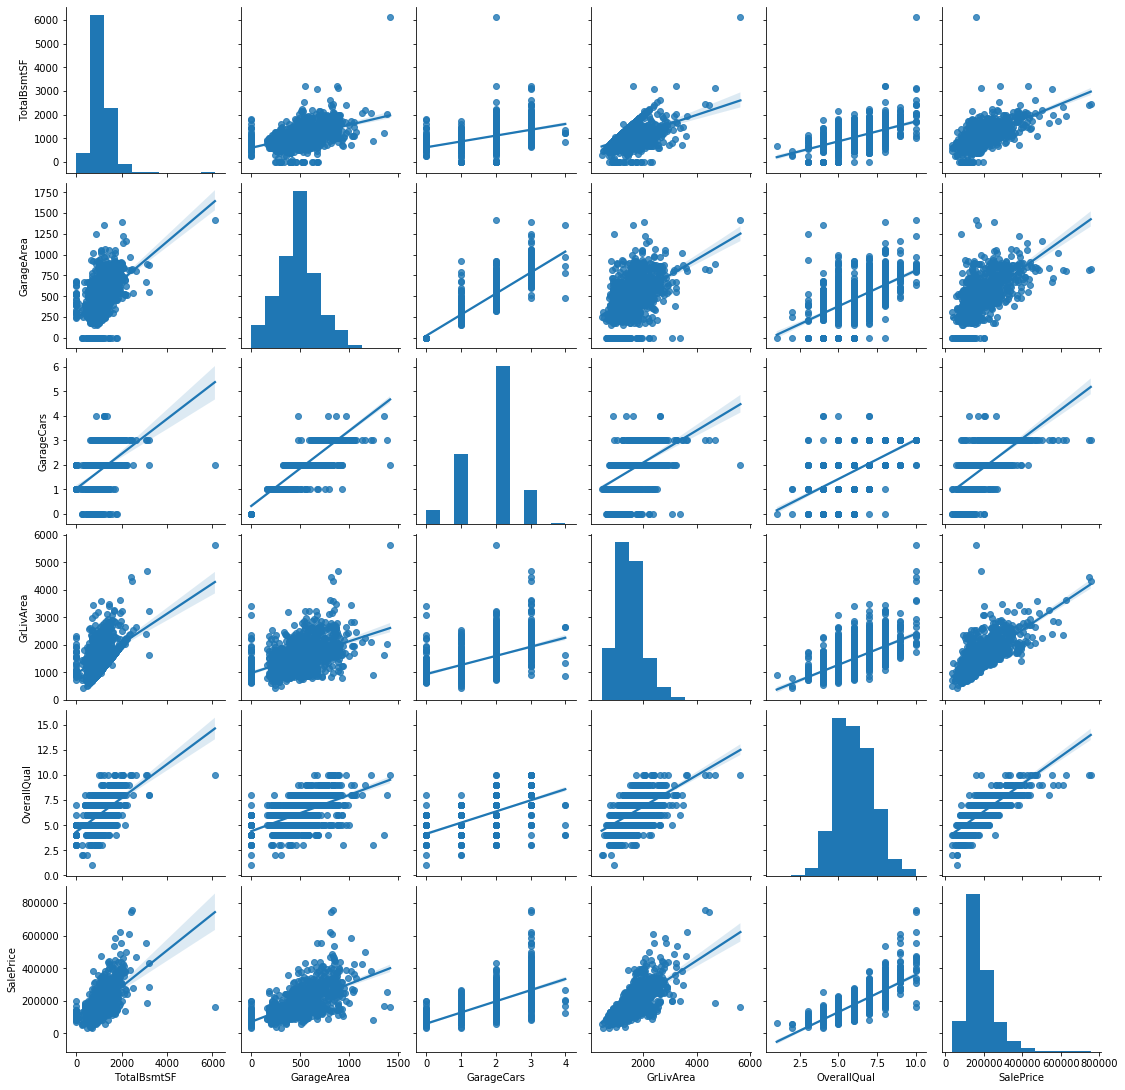

In [34]:
sns.pairplot(house_price_child_df[corr_colms],kind='reg')

### `now lets take a look at outliers and will remove them`

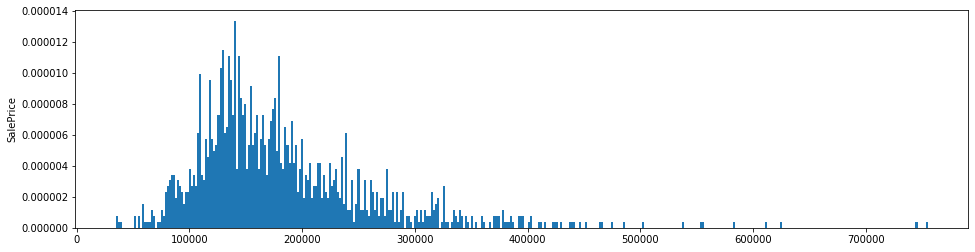

In [35]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0

x =house_price_child_df['SalePrice']
plt.hist(x, normed=True, bins=400)
plt.ylabel('SalePrice');

`we can see there is a huge varience in outlier so let remove them `

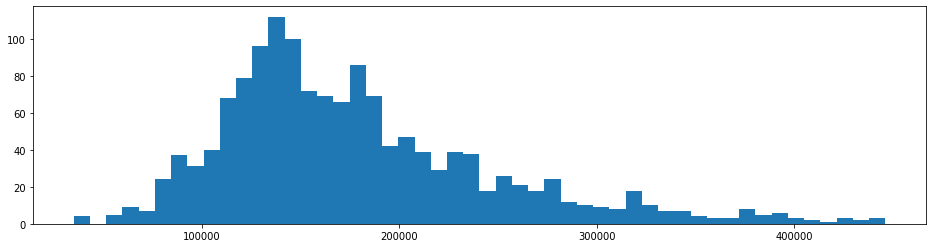

(1439, 1)

In [36]:
def reject_outliers(SalePrice):
    filtered= [e for e in (house_price_child_df['SalePrice']) if (e < 450000)]
    return filtered

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0

filtered = reject_outliers('SalePrice')
plt.hist(filtered, 50)
fig_size[0]=16.0
fig_size[1]=8.0
plt.show()

df_no_outliers = pd.DataFrame(filtered)
df_no_outliers.shape

`so we can remove 14 sampls from data set`

In [37]:
house_price_child_df = house_price_child_df[house_price_child_df['SalePrice']<450000]

In [38]:
# now lets work on the catogarical variables 
print(list(house_price_child_df.dtypes[house_price_child_df.dtypes=='object'].index))
cat_var = (list(house_price_child_df.dtypes[house_price_child_df.dtypes=='object'].index))

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


`We have 38 catogarical variables will add dummey variables to them`

In [39]:
# Lets work on this columns and try maping with numeric values with dummies
house_price_child_df[cat_var].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [40]:
#encoder = OneHotEncoder(drop='first')
#encoder.fit(house_price_child_df[cat_var])
#house_price_child_df = encoder.fit_transform(house_price_child_df[cat_var])
dummy_var = pd.get_dummies(house_price_child_df, columns=cat_var,drop_first=True)
house_price_child_df = pd.concat([house_price_child_df,dummy_var],axis=1)

In [41]:
house_price_child_df.shape

(1439, 283)

In [42]:
# droping atogorical variable presents
house_price_child_df = house_price_child_df.drop(cat_var, axis=1)

In [43]:
house_price_child_df.shape

(1439, 245)

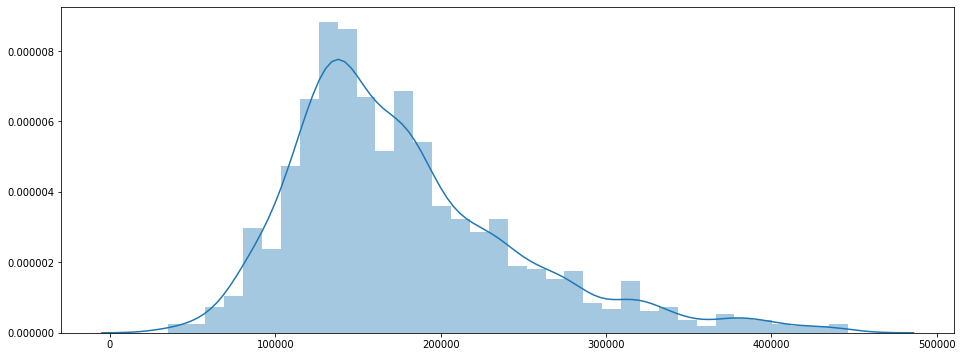

In [44]:
#lest verify the distribution
plt.figure(figsize=(16,6))
sns.distplot(house_price_child_df.SalePrice)
plt.show()

`From above plot we could see the modle normaly distributed`

## `Lets check the Regression R2 Score`

In [45]:
X = house_price_child_df.loc[:, house_price_child_df.columns !='SalePrice' ]
y = house_price_child_df.loc[:, house_price_child_df.columns == 'SalePrice']
y = y.iloc[:, 1:2] #Somewhere Sales price got addedd twice so removing :)

# split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 100)

In [46]:
len(X_train.columns)

243

In [47]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=70, step=1, verbose=0)

In [48]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [49]:
#We having 245 features so let remove some of them via RFE
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [50]:
rfe_sel_columns

['OverallQual',
 'BsmtFullBath',
 'FullBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'YrSold_Old',
 'OverallQual',
 'BsmtFullBath',
 'FullBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'YrSold_Old',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandSlope_Sev',
 'Neighborhood_Crawfor',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'RoofStyle_Mansard',
 'RoofMatl_CompShg',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_CBlock',
 'Exterior1st_WdShing',
 'Exterior2nd_CBlock',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtCond_Po',
 'BsmtExposure_Gd',
 'Heating_OthW',
 'HeatingQC_Po',
 'Electrical_FuseP',
 'Electrical_Mix',
 'KitchenQual_Fa'

In [51]:
#Selceting optimal Values selected by RFE
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

### `Lets try with Lasso`

In [52]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8599648907885062
0.8200860935137463


In [53]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [x for x in model_parameter]
col = X_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('OverallQual', array([-264467.6432593])),
 ('OverallQual', 22249.397052586668),
 ('BsmtFullBath', 1.8424991495924902e-10),
 ('BsmtFullBath', 12675.817503822105),
 ('FullBath', 6.582830223032241e-09),
 ('FullBath', 13027.41167177253),
 ('BedroomAbvGr', 5.808261733302073e-10),
 ('BedroomAbvGr', 3591.5201892042164),
 ('TotRmsAbvGrd', 3.3304722291959066e-10),
 ('TotRmsAbvGrd', 4255.929077556764),
 ('Fireplaces', 0.0),
 ('Fireplaces', 5795.752767705213),
 ('GarageCars', 8.207489973464258e-10),
 ('GarageCars', 6007.9853869597155),
 ('YrSold_Old', 3.611188712493278e-11),
 ('YrSold_Old', -456.3098624160743),
 ('OverallQual', -5.5799330530093545e-14),
 ('OverallQual', -8309.550535554175),
 ('BsmtFullBath', -7.213562088942419e-13),
 ('BsmtFullBath', 3107.246678086742),
 ('FullBath', 1.2527078325154297e-09),
 ('FullBath', -2201.148617682578),
 ('BedroomAbvGr', -0.0),
 ('BedroomAbvGr', -4129.623867347903),
 ('TotRmsAbvGrd', -3.8186198696701416e-10),
 ('TotRmsAbvGrd', 3228.224696483856),
 ('Firep

`lets try to improve our model with the optimal value of alpha using GridSearchCV`

In [54]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits=10,shuffle=True,random_state=42)

# specify range of hyperparameters
hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0]}


# grid search
# lasso model
model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    3.6s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [55]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.064408,0.009939,0.001809,0.000453,0.001,{'alpha': 0.001},0.854276,0.808223,0.809527,0.706039,...,0.862561,0.861830,0.852659,0.859041,0.862963,0.861557,0.864671,0.867282,0.861240,0.003719
1,0.057002,0.002418,0.001788,0.000262,0.010,{'alpha': 0.01},0.854276,0.808230,0.809532,0.706084,...,0.862561,0.861830,0.852659,0.859041,0.862963,0.861557,0.864671,0.867282,0.861240,0.003719
2,0.056234,0.002558,0.001669,0.000109,0.100,{'alpha': 0.1},0.854282,0.808301,0.809590,0.706542,...,0.862561,0.861830,0.852659,0.859041,0.862963,0.861557,0.864671,0.867281,0.861239,0.003719
3,0.058023,0.003909,0.001781,0.000283,1.000,{'alpha': 1.0},0.854323,0.809007,0.810163,0.711062,...,0.862540,0.861812,0.852642,0.859031,0.862948,0.861538,0.864654,0.867261,0.861222,0.003718
4,0.056717,0.001444,0.002090,0.000527,5.000,{'alpha': 5.0},0.854491,0.812098,0.812628,0.730063,...,0.862073,0.861407,0.852263,0.858859,0.862642,0.861104,0.864260,0.866862,0.860835,0.003708


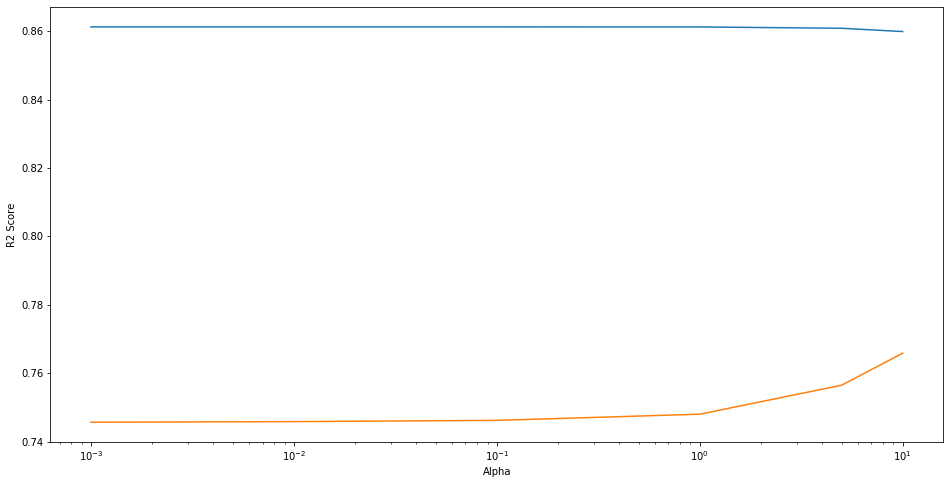

In [56]:
# ploting the 
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [57]:

# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 10.0}

In [73]:
# Verifying with the best Alpah Value
lasso = Lasso(alpha = 10.0)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8582886298530916
0.8417578129243345


In [74]:
# Identifying the Top Feature
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [75]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
57,Exterior1st_CBlock,308163
56,RoofMatl_WdShngl,227347
52,RoofMatl_Metal,203574
54,RoofMatl_Tar&Grv,196566
55,RoofMatl_WdShake,196486
53,RoofMatl_Roll,161754
44,Condition2_PosN,61494.7
39,Neighborhood_NridgHt,52541.1
85,SaleCondition_Partial,48771.3
84,SaleType_New,39450.2


## `Now lets use the ridge regression`

In [61]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8599641468517061
0.821364971056366


`Above Alpha value is not optimal,Now  lets try to improve our model with the optimal value of alpha using GridSearchCV`

In [62]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [63]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005703,0.001675,0.002354,0.000747,0.001,{'alpha': 0.001},0.854290,0.808328,0.809556,0.707713,...,0.862560,0.861829,0.852658,0.859041,0.862963,0.861556,0.864670,0.867281,0.861239,0.003719
1,0.005769,0.002403,0.001890,0.000794,0.010,{'alpha': 0.01},0.854406,0.809241,0.809818,0.721517,...,0.862487,0.861773,0.852611,0.859039,0.862904,0.861489,0.864600,0.867202,0.861179,0.003709
2,0.005412,0.002838,0.001750,0.000364,0.100,{'alpha': 0.1},0.854969,0.816043,0.811879,0.789475,...,0.859610,0.859301,0.850545,0.858933,0.860281,0.858881,0.861894,0.864148,0.858754,0.003449
3,0.003842,0.000344,0.001523,0.000235,0.200,{'alpha': 0.2},0.855305,0.821154,0.813657,0.812491,...,0.856548,0.856369,0.848112,0.858699,0.857110,0.856110,0.859066,0.860931,0.856078,0.003410
4,0.004165,0.000683,0.001575,0.000230,0.500,{'alpha': 0.5},0.855954,0.830190,0.817395,0.827934,...,0.851215,0.850899,0.843529,0.857750,0.851038,0.851319,0.854213,0.855507,0.851262,0.003820


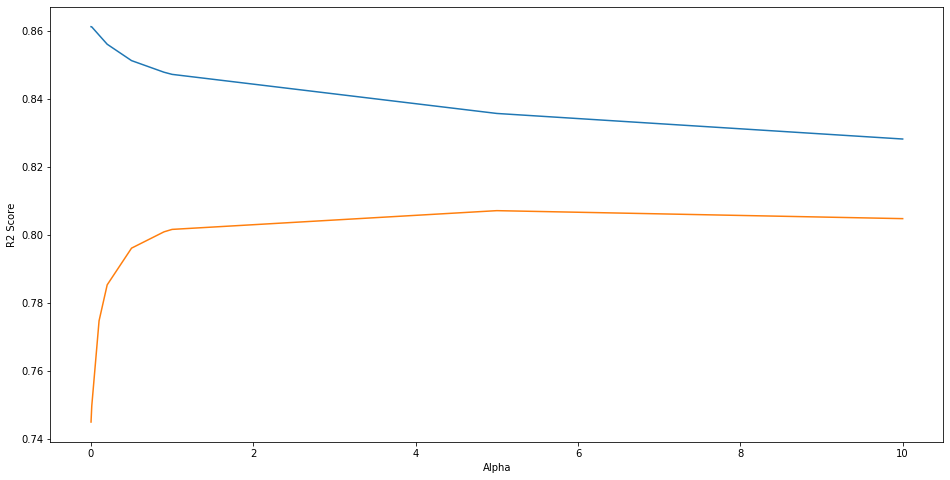

In [64]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [65]:

# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 5.0}

In [69]:
ridge = Ridge(alpha = 5.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8352117820425163
0.8681963373751902


### `From above r2_score we can finalize lasso is currect modle so i will choose lasso for the modling and also we can easily eliminate the Features via Lasso`

## `Final Model`

In [67]:
# Verifying with the best Alpah Value
lasso = Lasso(alpha = 10.0)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8582886298530916
0.8417578129243345


### `Best Alpha value for lasso = 10.0`
### `Best Alpha Value for lasso = 5.0`

### `My Top 5 Features would be`
1. Exterior1st_CBlock	
2. RoofMatl_WdShngl	
3. 	RoofMatl_Metal	 
4. RoofMatl_Tar&Grv	
5. 	RoofMatl_WdShake	

### `My next 5 Features would be`
1. RoofMatl_Roll	
2.	Condition2_PosN	
3.	Neighborhood_NridgHt	
4.	SaleCondition_Partial	
5.	SaleType_New	